# NN ASSIGNMENT 2

### Name : PALAK NATH
### PRN  : 17070124048    

STEP 1: IMPORTING THE LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,Activation,BatchNormalization,Dropout,MaxPooling2D,SeparableConv2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
%matplotlib inline
import os   #operating system module
from os import listdir
from os.path import isfile, join

STEP 2: FETCHING DATA and PREPARING THE TRAINING AND TESTING CLASSES 

In [2]:
base_dir = 'COVID-19 Radiography Database'
train_dir = os.path.join (base_dir, 'training')
test_dir = os.path.join (base_dir, 'testing')

train_normal = os.path.join (train_dir, 'normal')
test_normal = os.path.join (test_dir, 'normal')
train_viral = os.path.join (train_dir, 'viral')
test_viral = os.path.join (test_dir, 'viral')

num_train_viral = len(os.listdir(train_viral))
print('Number of Viral Pneumonia Training Data  {}'.format(num_train_viral))
num_train_normal = len(os.listdir(train_normal))
print('Number of Normal Pneumonia Training Data  {}'.format(num_train_normal))

num_test_viral = len(os.listdir(test_viral))
print('Number of Viral Pneumonia Testing Data  {}'.format(num_test_viral))
num_test_normal = len(os.listdir(test_normal))
print('Number of Normal Pneumonia Testing Data  {}'.format(num_test_normal))

total_train=num_train_viral+num_train_normal
total_test=num_test_viral+num_test_normal

Number of Viral Pneumonia Training Data  1071
Number of Normal Pneumonia Training Data  1069
Number of Viral Pneumonia Testing Data  269
Number of Normal Pneumonia Testing Data  268


In [3]:
# initialize list of lists 
data = [['Normal Train Data', num_train_normal], ['Normal Test Data', num_test_normal], ['Viral Train Data', num_train_viral], ['Viral Test Data', num_test_viral]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['TYPE', 'COUNT']) 
  
# print dataframe. 
df

,TYPE,COUNT
0,Normal Train Data,1069
1,Normal Test Data,268
2,Viral Train Data,1071
3,Viral Test Data,269


STEP 3 : SHOWING PERCENTAGE OF DIVISION OF DATA 

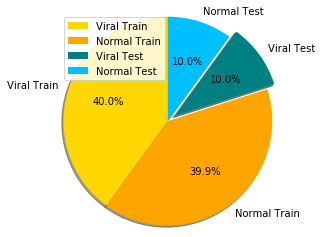

In [4]:
import matplotlib.pyplot as plt 
  
# defining labels 
activities = ['Viral Train', 'Normal Train', 'Viral Test', 'Normal Test'] 
  
# portion covered by each label 
slices = [num_train_viral, num_train_normal, num_test_viral, num_test_normal] 
  
# color for each label 
colors = ['gold', 'orange', 'teal', 'deepskyblue'] 
  
# plotting the pie chart 
plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0, 0, 0.1, 0), 
        radius = 1.2, autopct = '%1.1f%%') 
  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show() 


DEFINING THE BATCH SIZE 
>Batch size is a term used in machine learning and refers to the **number of training examples utilized in one iteration**.

IMAGE SHAPE
>Considering a square image of 150x150 dimension 

In [5]:
Batch_size=32   
img_width = 150
img_height = 150
Image_shape = 150
CATEGORIES=['Normal','Viral']

STEP 4: DEFINING THE TRAIN IMAGE GENERATOR : TRAINING DATA PREPROCESSING

In [6]:
#we will convert images to PIL format so Python can understand
train_image_generator = ImageDataGenerator(
    rescale= 1./255,  #data normalization 
    shear_range=0.2,  #transformation technique to apply on the 2D image for better understanding
    zoom_range=0.2,   #range for random zoom
    horizontal_flip=True   
)

train_data_gen=train_image_generator.flow_from_directory(
    batch_size=Batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(150,150),
    class_mode='binary'
)

Found 2140 images belonging to 2 classes.


IDENTIFYING THE LABELS

In [7]:
print(train_data_gen.class_indices)

{'normal': 0, 'viral': 1}


In [8]:
imgs,labels=next(train_data_gen)

DISPLAYING IMAGES IN THE TRAINING SET 
>Here I have shown just 3 images.

In [9]:
from skimage import io
def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

32
0.0


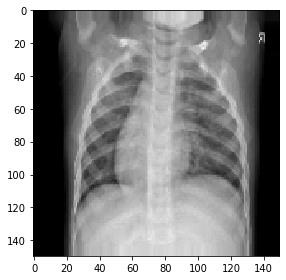

1.0


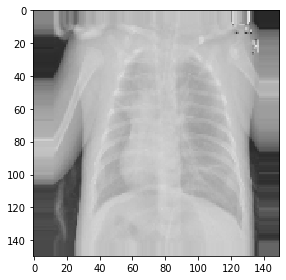

0.0


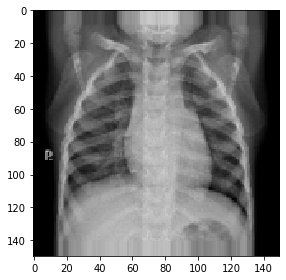

In [10]:
image_batch,label_batch = train_data_gen.next()
print(len(image_batch))
for i in range(0,3):
    image=image_batch[i]
    print(label_batch[i])
    imshow(image)

STEP 5: DEFINING THE TESTING IMAGE GENERATOR : TESTING DATA PREPROCESSING

In [11]:
#we will convert images to PIL format so Python can understand
test_image_generator = ImageDataGenerator(
    rescale= 1./255,  #data normalization    
)

test_data_gen=train_image_generator.flow_from_directory(
    batch_size=Batch_size,
    directory=test_dir,
    shuffle=False,
    target_size=(150,150),
    class_mode='binary'
)

Found 537 images belonging to 2 classes.


In [12]:
print(test_data_gen.class_indices)

{'normal': 0, 'viral': 1}


STEP 6: BUILDING THE MODEL : We will build the CNN model in this step:
- Apply kernal/feature detector on the input image and get value of feature map.
- To decide the number of feature detectors, they can be random. We will decide the number of features we will need, say 32, then kernal size(feature detector size) here 3x3.
- Defining the input Shape which defines the number of rows and columns the input images takes and the number 3 shows we are considering color images, incase of black and white images we will choose 1. 

In [13]:
#INITIALIZING THE CNN
model= Sequential()

#ADDING THE FIRST CONVOLUTIONAL  LAYER
model.add(Conv2D(filters=32, kernel_size= (3,3), activation='relu', input_shape=(150,150,3)))
#ADDING THE MAX POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))

#ADDING THE SECOND LAYER
model.add(Conv2D(filters=64, kernel_size= (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#ADDING THE THIRD LAYER
model.add(Conv2D(filters=128, kernel_size= (2,2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#ADDING THE FOURTH LAYER
model.add(Conv2D(filters=256, kernel_size= (2,2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25)) #noisy data is removed through dropout and it increases accuracy

#FLATTENING LAYER
model.add(Flatten())

#FULLY CONNECTED LAYER
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

#OUTPUT LAYER
model.add(Dense(units=1, activation='sigmoid'))   #sigmoid as binary classification


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0

STEP 7 : COMPILING THE MODEL 

In [14]:
#As we are to classify only NORMAL OR VIRAL, we use binary crossentropy
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"] ) 

STEP 8: TRAINING THE MODEL 

In [15]:
history=model.fit(x=train_data_gen, validation_data=test_data_gen, epochs=25)

Epoch 1/25
67/67 [==============================] - 84s 1s/step - loss: 0.6953 - accuracy: 0.7636 - val_loss: 0.8444 - val_accuracy: 0.5009
Epoch 2/25
67/67 [==============================] - 84s 1s/step - loss: 0.2573 - accuracy: 0.9121 - val_loss: 0.6558 - val_accuracy: 0.5084
Epoch 3/25
67/67 [==============================] - 79s 1s/step - loss: 0.2550 - accuracy: 0.9121 - val_loss: 0.5617 - val_accuracy: 0.9032
Epoch 4/25
67/67 [==============================] - 81s 1s/step - loss: 0.2031 - accuracy: 0.9266 - val_loss: 0.7625 - val_accuracy: 0.5028
Epoch 5/25
67/67 [==============================] - 80s 1s/step - loss: 0.2059 - accuracy: 0.9290 - val_loss: 1.8920 - val_accuracy: 0.5009
Epoch 6/25
67/67 [==============================] - 78s 1s/step - loss: 0.2141 - accuracy: 0.9252 - val_loss: 0.8972 - val_accuracy: 0.5233
Epoch 7/25
67/67 [==============================] - 81s 1s/step - loss: 0.1943 - accuracy: 0.9355 - val_loss: 0.3085 - val_accuracy: 0.8883
Epoch 8/25
67/67 [==

STEP 9 : MODEL EVALUATION 

In [16]:
score= model.evaluate(test_data_gen , verbose=0)
print('Score of the Model is :', score)

Score of the Model is : [0.2530343532562256, 0.9143389463424683]


- TRAINING AND TESTING ACCURACY 
> Accuracy is given by Number of Correct Predictions/ Total Number of Predictions

In [17]:
acc_max=max(history.history['accuracy'])
acc= history.history['accuracy']
val_acc_max=max(history.history['val_accuracy'])
val_acc= history.history['val_accuracy']

print('Training Accuracy is : ', acc_max)
print('Testing Accuracy is : ', val_acc_max)

Training Accuracy is :  0.9546728730201721
Testing Accuracy is :  0.9217877388000488


- PLOTTING THE GRAPH FOR ACCURACY AND LOSS

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


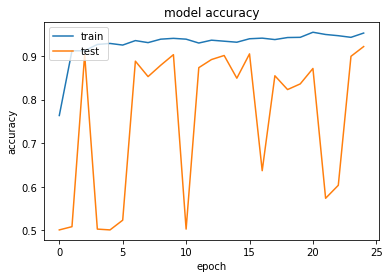

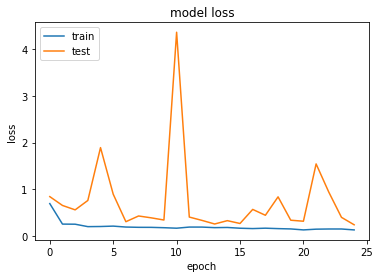

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model aAcuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

STEP 10: MODEL VALIDATION

In [20]:
predict_dir_path='validation/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path,f))]
print(onlyfiles)

['NORMAL (1024).png', 'NORMAL (1067).png', 'NORMAL (880).png', 'NORMAL (930).png', 'Viral Pneumonia (146).png', 'Viral Pneumonia (153).png', 'Viral Pneumonia (166).png', 'Viral Pneumonia (176).png', 'Viral Pneumonia (32).png']


In [21]:
# predicting images
from keras.preprocessing import image
normal_counter = 0 
viral_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'normal')
        normal_counter += 1
    else:
        print(file + ": " + 'viral')
        viral_counter += 1
print("Normal Pneumonia Cases :",normal_counter)
print("Viral Pneumonia Cases :",viral_counter)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
NORMAL (1024).png: normal
NORMAL (1067).png: normal
NORMAL (880).png: normal
NORMAL (930).png: normal
Viral Pneumonia (146).png: viral
Viral Pneumonia (153).png: normal
Viral Pneumonia (166).png: normal
Viral Pneumonia (176).png: normal
Viral Pneumonia (32).png: normal
Normal Pneumonia Cases : 8
Viral Pneumonia Cases : 1


FINAL STEP: CALCULATING KAPPA VALUES
>The kappa statistic is used to control only those instances that may have been correctly classified by chance. This can be calculated using both the observed (total) accuracy and the random accuracy. 
>Kappa can be calculated as:
#### Kappa = (total accuracy – random accuracy) / (1- random accuracy)


In [25]:
actuals = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])
preds   = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0])

In [26]:
actuals.shape

(9,)

MAKING CONFUSION MATRIX TO CALCULATE KAPPA VALUES

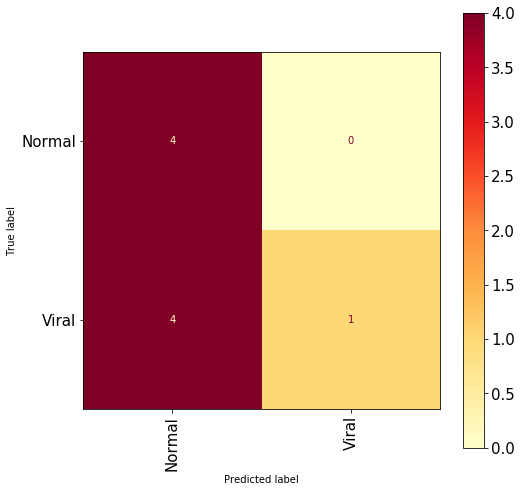

In [69]:
cm = confusion_matrix(actuals, preds);
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=CATEGORIES)

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

fig, ax = plt.subplots(figsize=(8, 8))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='YlOrRd')

plt.show()

KAPPA VALUE CALCULATION 
>As I couldn't find the direct code,I read about Kappa from google and calculated it manually 

In [43]:
a=cm[0][0] 
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]

#observed proportionate agreement

pO=(a+d)/(a+b+c+d)

pYes= ((a+b)/(a+b+c+d))*((a+c)/(a+b+c+d))
pNo = ((c+d)/(a+b+c+d))*((b+d)/(a+b+c+d))
pE=pYes+pNo

kappa=(pO-pE)/(1-pE)

print('The Kappa Value is : ', kappa)

The Kappa Value is :  0.18181818181818193


### END OF ASSIGNMENT